In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('titanic_train.csv')

In [11]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [14]:
df.isna().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df.drop(['Unnamed: 0', 'Name', 'Ticket'], axis=1, inplace=True)

In [16]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [17]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [18]:
df['Sex'] = pd.get_dummies(data=df['Sex'],drop_first=True, dtype=int)

In [19]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,71.2833,C85,C
2,3,1,3,0,26.0,0,0,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,53.1000,C123,S
4,5,0,3,1,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,NaN,S
887,888,1,1,0,19.0,0,0,30.0000,B42,S
888,889,0,3,0,NaN,1,2,23.4500,NaN,S
889,890,1,1,1,26.0,0,0,30.0000,C148,C


In [20]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [21]:
df = df.drop('Cabin', axis=1)

In [22]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S
887,888,1,1,0,19.0,0,0,30.0000,S
888,889,0,3,0,NaN,1,2,23.4500,S
889,890,1,1,1,26.0,0,0,30.0000,C


In [23]:
df[['Q', 'S']]=pd.get_dummies(df['Embarked'], drop_first=True, dtype=int)

In [24]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.086420,0.722783
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [25]:
df.drop('Embarked', axis=1, inplace=True)

In [26]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0,1
887,888,1,1,0,19.0,0,0,30.0000,0,1
888,889,0,3,0,NaN,1,2,23.4500,0,1
889,890,1,1,1,26.0,0,0,30.0000,0,0


<Axes: ylabel='Frequency'>

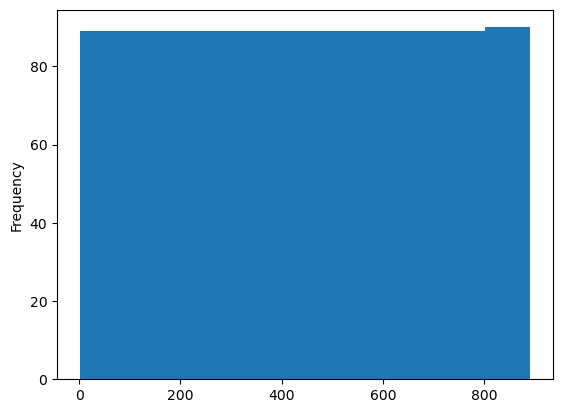

In [27]:
df['PassengerId'].plot.hist()

In [28]:
df['PassengerId'].value_counts()

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

In [29]:
df=df.drop('PassengerId', axis=1)

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,NaN,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


In [31]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.086420,0.722783
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


<Axes: xlabel='Age', ylabel='Count'>

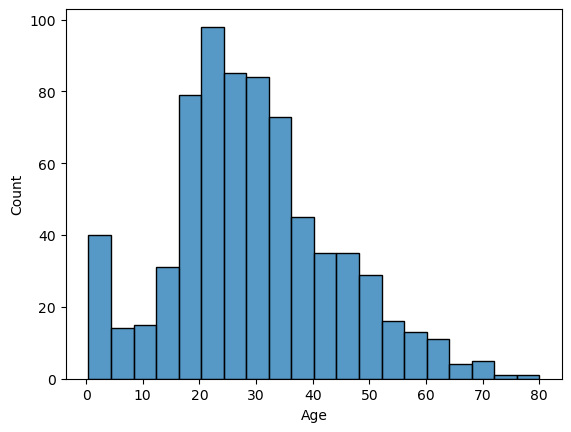

In [32]:
sns.histplot(data=df, x='Age')

<Axes: xlabel='Fare'>

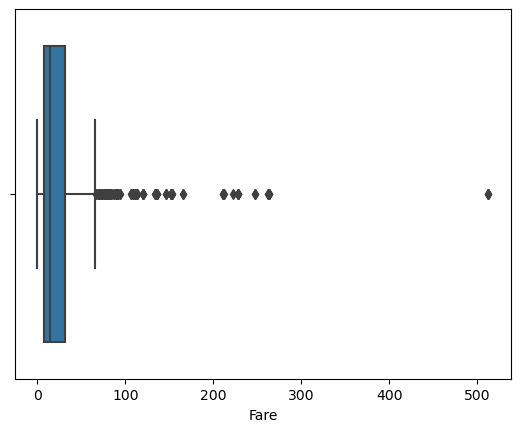

In [33]:
sns.boxplot(data=df, x='Fare')

In [34]:
df['Age'].quantile(0.25)

20.125

In [35]:
df['Age'].mean()

29.69911764705882

In [36]:
df['Age'].median()

28.0

In [37]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.086420,0.722783
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Q         891 non-null    int64  
 8   S         891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [39]:
from sklearn.impute import SimpleImputer

In [40]:
si = SimpleImputer(strategy='median', verbose=4)

In [41]:
df['Age'] = si.fit_transform(df[['Age']])

In [42]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,28.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


In [43]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.086420,0.722783
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


<Axes: xlabel='Survived', ylabel='Count'>

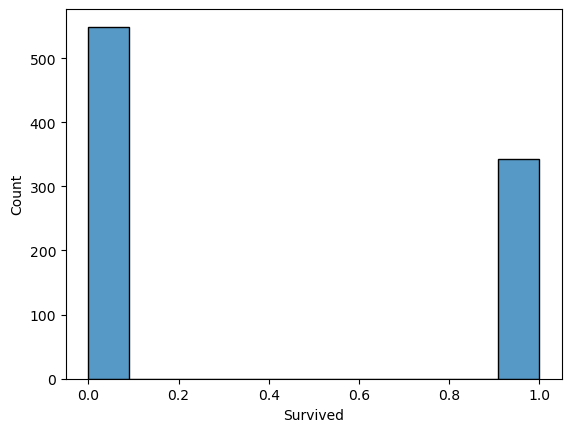

In [44]:
sns.histplot(data=df, x='Survived')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

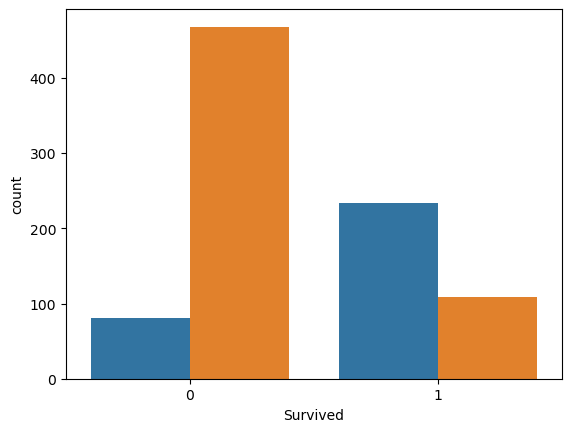

In [45]:
sns.countplot(data=df, x='Survived', hue='Sex')
plt.legend()

In [ ]:
sns.countplot(data=df, x='Pclass')

In [ ]:
sns.countplot(data=df, x='Survived',hue='Pclass')

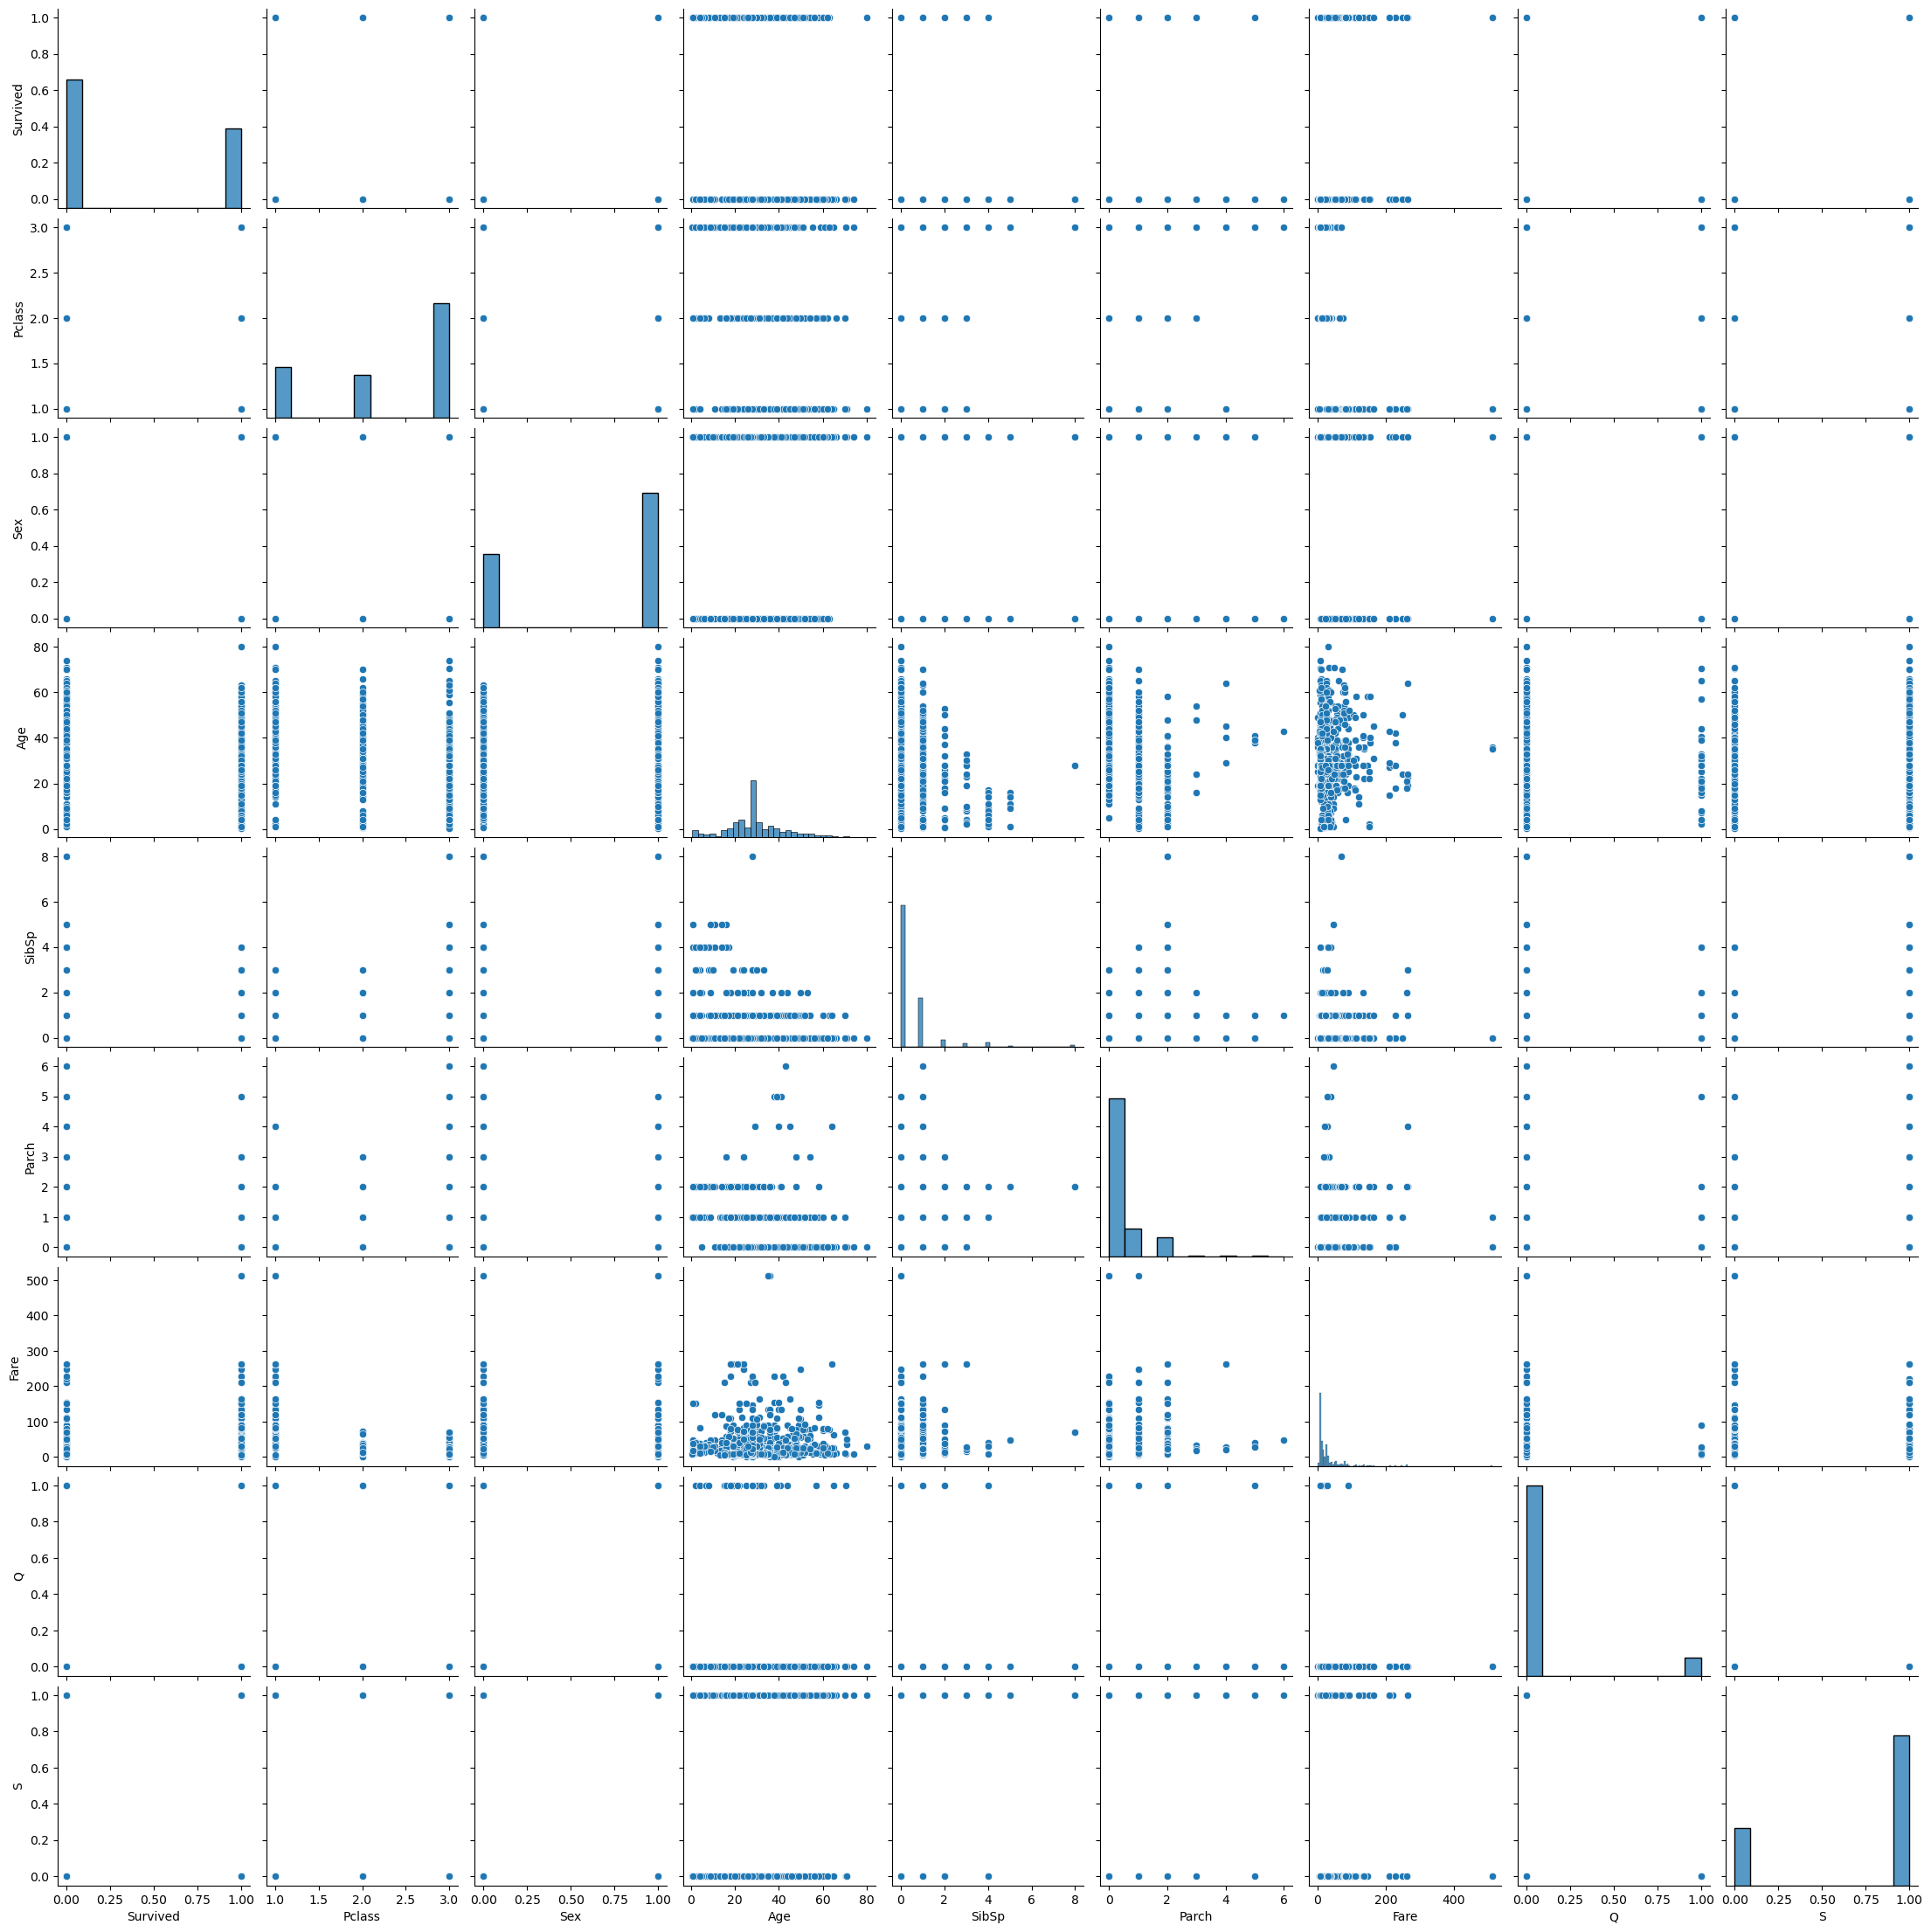

In [46]:
sns.pairplot(data=df)

In [47]:
scaler=StandardScaler()

In [48]:
X_scaled = scaler.fit_transform(df.drop('Survived', axis=1))

In [49]:
X = pd.DataFrame(X_scaled, columns=df.columns[:-1])

In [50]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q
0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,-0.307562,0.619306
1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-0.307562,-1.614710
2,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,-0.307562,0.619306
3,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,-0.307562,0.619306
4,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,-0.307562,0.619306
...,...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,-0.386671,-0.307562,0.619306
887,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,-0.044381,-0.307562,0.619306
888,0.827377,-1.355574,-0.104637,0.432793,2.008933,-0.176263,-0.307562,0.619306
889,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,-0.044381,-0.307562,-1.614710


In [51]:
y = df['Survived']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
model = LogisticRegression()

In [54]:
model.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred = model.predict(X_test)

In [56]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [57]:
accuracy_score(y_test, y_pred)

0.8100558659217877

In [58]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.84       105\n           1       0.79      0.74      0.76        74\n\n    accuracy                           0.81       179\n   macro avg       0.81      0.80      0.80       179\nweighted avg       0.81      0.81      0.81       179\n'

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [60]:
print(confusion_matrix(y_test, y_pred))

[[90 15]
 [19 55]]


In [61]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [62]:
y_test.value_counts()

Survived
0    105
1     74
Name: count, dtype: int64

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn=KNeighborsClassifier(n_neighbors=5)

In [65]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
knnpred = knn.predict(X_test)

In [67]:
accuracy_score(y_test, knnpred)

0.8044692737430168

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc=RandomForestClassifier(n_estimators=100)

In [70]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
rfcpred = rfc.predict(X_test)

In [72]:
accuracy_score(y_test, rfcpred)

0.8212290502793296

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
params = {
    'max_depth': list(range(10,15)),
    'n_estimators': list(range(50,100,10)),
    'max_features': list(range(3,7)),
    'min_samples_leaf': list(range(3,5)),
}

In [75]:
grid = GridSearchCV(rfc,param_grid=params, cv=5, scoring='accuracy', n_jobs=-1, verbose=4)

In [76]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [3, 4],
                         'n_estimators': [50, 60, 70, 80, 90]},
             scoring='accuracy', verbose=4)

In [77]:
grid.score(X_test, y_test)

0.8156424581005587

In [78]:
grid.best_estimator_

RandomForestClassifier(max_depth=14, max_features=5, min_samples_leaf=3,
                       n_estimators=70)

In [79]:
rfc = grid.best_estimator_

In [80]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, max_features=5, min_samples_leaf=3,
                       n_estimators=70)

In [81]:
y_pred = rfc.predict(X_test)

In [82]:
accuracy_score(y_test, y_pred)

0.8268156424581006

So, we will use this RandomForest Classifier with best paramters

In [84]:
import pickle

In [85]:
with open('RFC_MODEL_FILE.pkl', 'wb') as file:
    pickle.dump(rfc,file)